In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib

%matplotlib inline

In [2]:
users_vk_info_file_path_mask = "../Data/ProcesData/users_vk_info/users_from_%s_cluster_info.csv"

In [43]:
cluster_list = [0,136,45, 53, 137, 123, 105, 129]

In [72]:
data_frames = {}
for cluster_num in cluster_list:
    cluster_users_info_df = pd.read_csv(users_vk_info_file_path_mask %(cluster_num), encoding='windows-1251')
    data_frames[cluster_num] = cluster_users_info_df

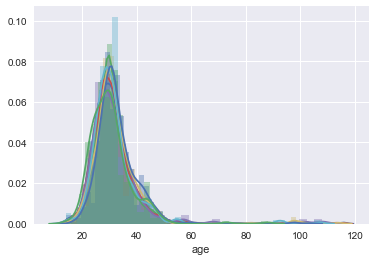

In [75]:
#age distributution with kde
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    sns.distplot(df[~df.age.isnull()].age)

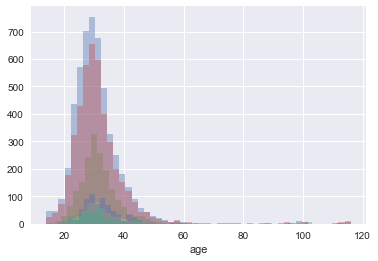

In [76]:
#age distribution without kde
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    sns.distplot(df[~df.age.isnull()].age, kde=False)

Возростное распределение во всех исследуемых кластерах одинаковое. Пик приходится на 30 лет, подростки в распределении практически отсутсвуют.

TODO
1) Необходимо узнать в каком году и в каком возрасте люди оставляли чекины.
2) Необходимо узнать пользуются ли подростки VK
    2.1) Возможно подростки не раскрывают год своего рождения
    2.2) Подростки не оставляют чекины в заведениях выделенных кластеров
    2.3) Подростки отсутсвуют в ВК

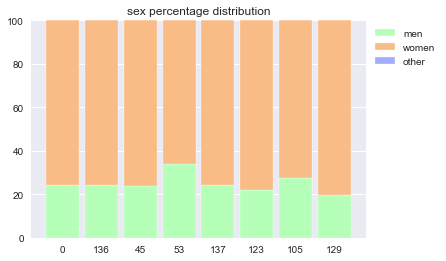

In [97]:
#sex distribution - percentage
sex_dist_list = []
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    
    sex_dist_dict = {}
    sex_value_counts = df.sex.value_counts()
    
    sex_dist_dict['cluster_num'] = cluster_num
    sex_dist_dict['women'] = sex_value_counts[1] if 1 in sex_value_counts.index else 0
    sex_dist_dict['men'] = sex_value_counts[2] if 2 in sex_value_counts else 0
    sex_dist_dict['other'] = sex_value_counts[3] if 3 in sex_value_counts else 0
    
    sex_dist_list.append(sex_dist_dict)
    
sex_dist_df = pd.DataFrame(sex_dist_list)

r = sex_dist_df.index

totals = [i+j+k for i,j,k in zip(sex_dist_df['men'], sex_dist_df['women'], sex_dist_df['other'])]
men = [i / j * 100 for i,j in zip(sex_dist_df['men'], totals)]
women = [i / j * 100 for i,j in zip(sex_dist_df['women'], totals)]
other = [i / j * 100 for i,j in zip(sex_dist_df['other'], totals)]

# plot
barWidth = 0.85
names = (sex_dist_df.cluster_num.tolist())

plt.bar(r, men, color='#b5ffb9', edgecolor='white', width=barWidth, label="men")

plt.bar(r, women, bottom=men, color='#f9bc86', edgecolor='white', width=barWidth , label='women')

plt.bar(r, other, bottom=[i+j for i,j in zip(men, women)], color='#a3acff', edgecolor='white', width=barWidth, label='other')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('sex percentage distribution')

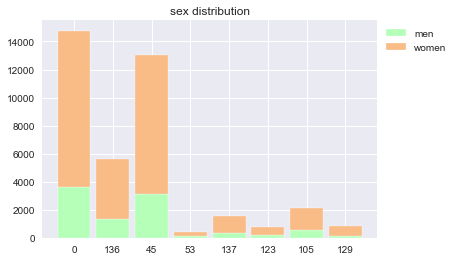

In [99]:
#sex distribution

men = sex_dist_df['men'].tolist()
women = sex_dist_df['women'].tolist()
other = sex_dist_df['other'].tolist()

plt.bar(r, men, color='#b5ffb9', edgecolor='white', width=barWidth, label='men')
plt.bar(r, women, bottom=men, color='#f9bc86', edgecolor='white', width=barWidth, label='women')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('sex distribution')

Чекины в ВК основном оставлют женщины в соотношении 4 к 1. Кластеры 0,136,45 имеют одинаковое соотношение м\ж, при этом это вложенные друг в друга кластера. Возможно это одни и те же люди. Против данной гипотезы выступают низкие метрики межкластерной схожести

TODO
Посмотреть насколько чаще женщины чекинятся

In [ ]:
#occupation distribution
